# Classification of Matroidal Subdivisions of (3,8)-hypersimplex

In the following computations we classify matroidal subdivisions of $\Delta(3,8)$ using properties of their dual graphs. We study these subdivisions up to symmetry. This symmetry is induced by the action of the symmetric group $\mathfrak{S}_8$ on height functions $w\in\text{TGr}_0(3,8)\subset \mathbb{R}^{{[8]\choose 3}}$, where we think of $\mathfrak{S}_8$ as a subgroup of $\mathfrak{S}_{56}$.

That is, for $\sigma\in\mathfrak{S}_{8}$ and $\{i,j,k\}\in{[8]\choose 3}$, we take $\sigma\circ\{i,j,k\}=\{\sigma(i),\sigma(j),\sigma(k)\}$. In this way, we induce a permutation on the entries of $w$.

For each cone of $\text{TGr}_{0}(3,8)$, we have a representative from the interior. In other words, we have a representative for each symmetry class of matroidal subdivision.

In [2]:
using Oscar
using Combinatorics
pm = Polymake

Polymake

In [3]:
cd("..")

In [4]:
include("src/inputData38.jl");
include("src/fileHandling.jl")
include("src/tscCoordRing.jl");
include("src/matroidalSubd.jl");
include("src/Bmaximal.jl");
include("src/simplifyIdeal.jl");

In [5]:
function string2Int64Vector(s)
    return map(i -> parse(Int64, i), split(s))
end

function file2SetVectors(fileName)
    return map(s -> string2Int64Vector(s), readlines(fileName))
end

file2SetVectors (generic function with 1 method)

Let $w\in\text{TGr}_{0}(3,8)$. Then $w$ induces a matroidal subdivision of $\Delta(3,8)$, denoted $\mathcal{Q}(w)$. The tightspan, denoted $\text{TS}(w)$ is a polytopal complex whose faces are dual to $\mathcal{Q}(w)$. Each face of codimension $k$ of $TS(w)$ corresponds to a $k$ dimensonal face of $\mathcal{Q}(w)$.

Let $\Gamma(w)$ be the graph dual to the subdivision induced by $w$. That is, $\Gamma(w)$ has a vertex $v$ for each maximal cell $C_v$ of $\mathcal{Q}(w)$, and an edge between $v$ and $v^{\prime}$ if $C_v$ and $C_{^{\prime}}$ intersect in codimension one. Observe that $\Gamma(w)$ is the 1-skeleton of $\text{TS}(w)$.


**Variable notation**

```cone``` = cone of $\text{TGr}_0(3,8)$ corresponding to representative $w$ from interior.

```subd``` = $\mathcal{Q}(w)$.

```G``` = $\Gamma(w)$.

```Tmc``` = $\text{TS}(w)$.

```Mp``` = maximal polytopes of $\text{TS}(w)$ as sets of vertices of $\text{TS}(w)$. Note that these are saved as a matrix such that the $ith$ row corresponds to $ith$ polytope. 

```Mc``` = maximal cells of $\mathcal{Q}(w)$ as sets of vertices of $\Delta(3,8)$, saved as array of vectors of indices of vertices.

# Functions

**Function** ```use_edges```

*input* ```G```

*output* ```Set```

*Description* returns edges of ```G``` such that they are usable in subsequent functions.

In [6]:
function use_edges(G)
    E = collect(edges(G))
    return EE = Vector([sort([dst(e),src(e)]) for e in E])
end

use_edges (generic function with 1 method)

**Function**:```common_vertex``` 

*Input*: ```Mc```

*Output*: ```Set``` of indices of vertices of $\Delta(3,8)$.

*Description*: intersects vertex sets of maximal cells of $\mathcal{Q}(w)$, with the objective of finding a common basis of the matroids corresponding to these cells.

In [7]:
function common_vertex(Mc)
    
    return reduce(intersect,[c for c in Mc])

end

common_vertex (generic function with 1 method)

**Function**: ```is_tree```

*Input*: ```Gra```, ```Tmc```

*Output*: ```Integer```$F=E-V+1$

*Description*: Checks if $\Gamma(w)$ is a tree

In [8]:
function is_tree(G)
    
    return 0 == ne(G)-nv(G)+1 
    
end

is_tree (generic function with 1 method)

**Function** ```f```

*input*: edge ``e``,vertices of supergraph ``A``

*output*: elements of ``E`` relabeled using indices starting at 1

*Description* relabels vertices in subset of edges such that we can compute induced subgraph without extra vertices

In [9]:
function f(e,A)
    return [[i,j] for i in 1:length(A),j in 1:length(A) if A[i] == e[1] && A[j] == e[2]][1]
end

f (generic function with 1 method)

**Function**: ```leaf_cvp```

*Input*: ```Mc```, ```G```

*Output*: ```Set``` 

*Description*: Computes indices of common vertices maximal polytopes of $\mathcal{Q}(w)$ corresponding to faces of the subcomplex $\Sigma_{L}\subset \Sigma$ obtained by removing all leaves.

In [10]:
function leaf_cvp(Mc,G)
    c = [Mc[i] for i in 1:nv(G) if length(neighbors(G,i))>1]
    return reduce(intersect,c)
end

leaf_cvp (generic function with 1 method)

**Function** ``find_leaves_edges``

*input*: ``E``, edges of graph

*output*: ``Set``

*Description* Identifies leaf edges on graph ``G``. To be applied itertively

In [11]:
function find_leaves_edges(E)# E = edge set of graph
    
    vs = reduce(union,E)
    
    ls = [i for i in vs if length([e for e in E if i in e]) == 1]
    
    les = [e for e in E if e[1] in ls||e[2] in ls]
    
    return les
    
end

find_leaves_edges (generic function with 1 method)

**Function** ``find_branches``

*input*: ``E``, edges of graph

*output*: ``Set``

*Description* iteratively identifies leaf edges on graph ``G``. 

In [12]:
function find_branches(E)
    L = find_leaves_edges(E)

    B = vcat([],L)
    
    while !isempty(L)
        
        E = setdiff(E,L)
        
        L = find_leaves_edges(E)
        
        B = vcat(B,L)
        
    end
    
    return B
    
end

find_branches (generic function with 1 method)

**Function**: ```branch_cvp```

*Input*: ```Mc```, ```G```

*Output*: ```Set``` 

*Description*: Computes indices of common vertices of maximal polytopes $\mathcal{Q}(w)$ corresponding to faces of the subcomplex $\Sigma_{B}\subset \Sigma$ obtained by removing all branches.

In [13]:
function branch_cvp(Mc,G)
    
    E = use_edges(G)
    
    B = find_branches(E)
    
    vs = reduce(union,setdiff(E,B))
    
    return reduce(intersect,[Mc[i] for i in vs])
    
end

branch_cvp (generic function with 1 method)

**Function** ``fin_expoed``

*Input*: ``G``,``Fins=`` fins on $\Gamma(w)$

*Output*: ``Set``

*Description*: Indentifies exposed vertices of fins

In [15]:
function fin_exposed(G,Fins)
    
    E = use_edges(G)
    
    Branches = find_branches(E)
    
    Not_Branches = setdiff(Mp,Branches)
    
    exposed = []
    
    for P in Fins
      
        PB = setdiff(Not_Branches,[P])
       
        int = intersect(reduce(union,PB),P)
       
        ex = [i for i in P if !(i in int)]
       
       exposed = vcat(exposed,ex)
       
    end
    
    return exposed
    
end

fin_exposed (generic function with 1 method)

**Function** ```fins_1```

*input*: ```G```,```Ts```,```Mp```

*Output*: ```Set```

*Description* Identifies fins of contact edgelength $1$ on ```G```.

In [16]:
function fins_1(G,Ts,Mp)
  
    P2 = polyhedra_of_dim(Ts,2)
  
    Pinds = [[i for i in 1:length(vertices(Ts)) if vertices(Ts)[i] in vertices(P)] for P in P2]
   
    E = use_edges(G)
   
    NoBranch = setdiff(Mp,find_branches(E))
 
    finz = []
    
    for P in Pinds

        BodyP = setdiff(NoBranch,[P])
      
        Bint = intersect(reduce(union,BodyP),P)
       
        Es = [e for e in E if issubset(e,Bint)]
      
        if length(Es) == 1
            
            push!(finz,P)
            
        end
        
    end
    
    return finz
    
end

fins_1 (generic function with 1 method)

**Function** ```fin_1_cvp```

*input* : ```Mp```, ```Mc```, ```G```

*output*: ```Set```

*Description*: Computes indices of common vertices of cells of $\mathcal{Q}(w)$ corresponding to faces of the subcomplex $\Sigma_{F(1)}\subset\Sigma_{L}\subset\Sigma$ obtained by removing all leaves and fins with contact length $1$. 

In [17]:
function fin_1_cvp(Mc,G,Ts,Mp)
    
    Fins = fins_1(G,Ts,Mp)
    
    vs = [i for i in 1:nv(G) if length(neighbors(G,i)) != 1] #restrict to non leaf vertices
    
    exposed = fin_exposed(G,Fins)
    
    return reduce(intersect,[Mc[i] for i in setdiff(vs,exposed)])
end

fin_1_cvp (generic function with 1 method)

**Function** ```is_path```

*input*: ```Ograph```

*output*: ```bool```

*Description*: Checks if graph is isomorphic to a path. To be used to identify general fins

In [18]:
function is_path(Ograph)
    E = use_edges(Ograph)
    gpath = graph_from_edges(Vector([[i,i+1] for i in 1:length(E)]))
    return is_isomorphic(gpath,Ograph)
end

is_path (generic function with 1 method)

**Function** ``fins``

*input*: ``G``,``Ts``,``Mp``

*output*: ``Set``, collection of fins (of any contanct length) of $\Gamma(w)$

*Description*: Find fins on dual graph of tight span

In [22]:
function fins(G,Ts,Mp)
   
    P2 = polyhedra_of_dim(Ts,2)
 
    Pinds = [[i for i in 1:length(vertices(Ts)) if vertices(Ts)[i] in vertices(P)] for P in P2]
 
    E = use_edges(G)

    NoBranch = setdiff(Mp,find_branches(E))

    finz = []
    
    for P in Pinds

        BodyP = setdiff(NoBranch,[P])

        Bint = intersect(reduce(union,BodyP),P)
       
        Es = [e for e in E if issubset(e,Bint)]
        
        E2 = [f(e,Bint) for e in Es]  
   
        if 1<=length(Es)<=length(P)-2 && is_path(graph_from_edges(E2,length(Bint)))
            
            push!(finz,P)
            
        end
        
    end
    
    return finz
    
end

fins (generic function with 1 method)

**Function** ``fins_tree``

``input``: ``G``,``Mp``,``Ts``

``output``: ``(bool,Graph)``

``Description``: Checks if $\Sigma_{F}\subset\Sigma_{L}\subset\Sigma$ obtained by removing all leaves and fins is a tree. Returns induced subgraph.

In [21]:
function fins_tree(G,Ts,Mp)
    
    E = use_edges(G)
    
    Fins = fins(G,Ts,Mp) #compute fins
    
    exposed = fin_exposed(G,Fins) #compute exposed vertices of fins
    
    vs = [i for i in 1:nv(G) if length(neighbors(G,i))>1] #restrict to non leaf vertices
    
    internal = setdiff(vs,exposed) #compute internal vertices
    
    bes = [e for e in E if issubset(e,setdiff(vs,exposed))] #comute internal edges
      
    Es2 = [f(e,setdiff(vs,exposed)) for e in bes] #relabel vertices for induced subgraph

    GG = graph_from_edges(Es2) #compute induced subgraph
        
    return is_tree(GG),GG
end  

fins_tree (generic function with 1 method)

 # Classes of subdivision
 
 We will use the fucnctions defined above to sort matroidal subdivsions of $\Delta(3,8)$ into 6 combinatorial types.
 
 **G1**: Maximal cells of $\mathcal{Q}(w)$ share a common vertex.
 
 **G2**: $\Gamma(w)$ is a tree
 
 **G3**: The maximal cells of $\mathcal{Q}(w)$ corresponding to the subcomplex of $\text{TS}(w)$ obtained by removing all leaves share a common vertex.
 
 **G4**: The maximal cells of $\mathcal{Q}(w)$ corresponding to the subcomplex of $\text{TS}(w)$ obtained by removing all branches share a common vertex.
 
 **G5**: The maximal cells of $\mathcal{Q}(w)$ corresponding to the subcomplex of the $TS(w)$ obtained by first removing all leaves, and then removing all fins that intersect the body in a single edge, share a common vertex.
 
 **G6**: The maximal cells of $\mathcal{Q}(w)$ corresponding to subcomplex of $TS(w)$ obtained by removing all leaves and fins is a tree.
 
 Note that these categories are not mutually exclusive. However if a subdivision corresponding to $w$ is in $Gj$, then it is not in $Gi$ for $i<j$.
 
 Sorting matroid subdivisions up to symmetry in this way gives us a complete classification of all combinatorial types, for which we develop theory to prove properites about inverse limits.

# Examples

We compute some applications of the above functions.

In [23]:
d38 = hypersimplex(3,8)

Polytope in ambient dimension 8

***$G_1$ Common vertex property***

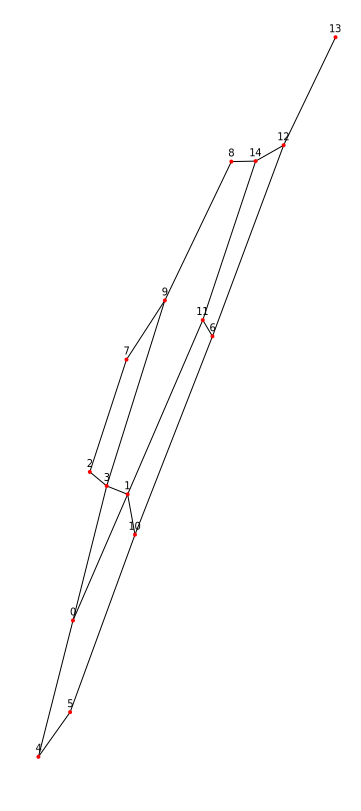

In [24]:
w = [-7, -33, 6, 6, 26, 25, -11, -2, -2, 18, 17, 2, 2, 22, 21, -42, -4, -5, -4, -5, -30, -32, 7, 7, -33, -34, -34, -34, 1, 0, 2, 40, 39, 40, 39, -31, 3, 3, -7, -8, -6, 32, 31, 32, 31, -39, -2, 36, 35, 36, 35, -35, -68, -54, -16, -16]
S = subdivision_of_points(d38,-w)#compute subdivision

Tmc = S.pm_subdivision.TIGHT_SPAN
Mp = Tmc.MAXIMAL_POLYTOPES#obtain maximal polytopes
Mp = [Vector(pm.row(Mp,i)) for i in 1:nrows(Mp)]#convert maximal polytopes to usable type
Mc = maximal_cells(S)#maximal cells of S
G = S.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
G = Graph{Undirected}(G.ADJACENCY)
visualize(G)

In [25]:
common_vertex(Mc)

2-element Vector{Int64}:
 32
 34

**$G_2$ Tree**

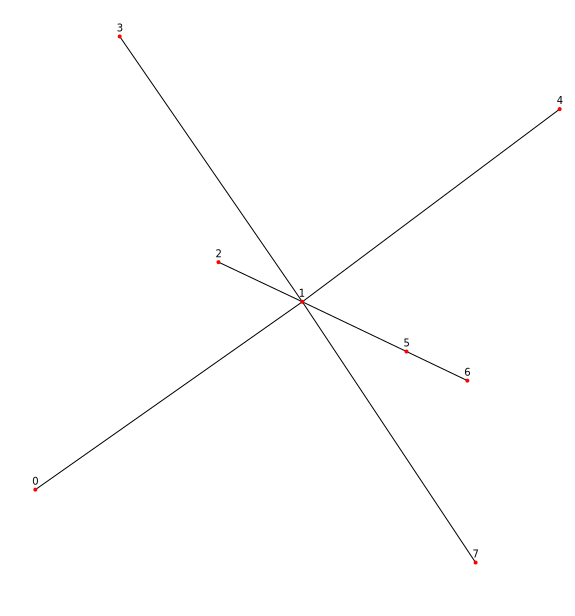

In [26]:
w = [12, 5, 5, -86, 5, 19, 5, 5, 19, 5, -86, -2, 12, -2, 12, 12, -2, 12, 12, 26, 12, 12, 12, 26, -93, 26, 5, 19, 5, -86, 19, 5, 19, 19, 33, 19, 5, -86, 5, 19, 19, 5, 19, 19, 33, 19, 12, -2, 12, 12, 26, 12, -23, -114, -23, -9]
S = subdivision_of_points(d38,-w)#compute subdivision

Tmc = S.pm_subdivision.TIGHT_SPAN
Mp = Tmc.MAXIMAL_POLYTOPES#obtain maximal polytopes
Mp = [Vector(pm.row(Mp,i)) for i in 1:nrows(Mp)]#convert maximal polytopes to usable type
Mc = maximal_cells(S)#maximal cells of S
G = S.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
G = Graph{Undirected}(G.ADJACENCY)
visualize(G)

In [27]:
common_vertex(Mc)

Int64[]

In [28]:
is_tree(G)

true

**$G_3$ Leaf common vertex propety**

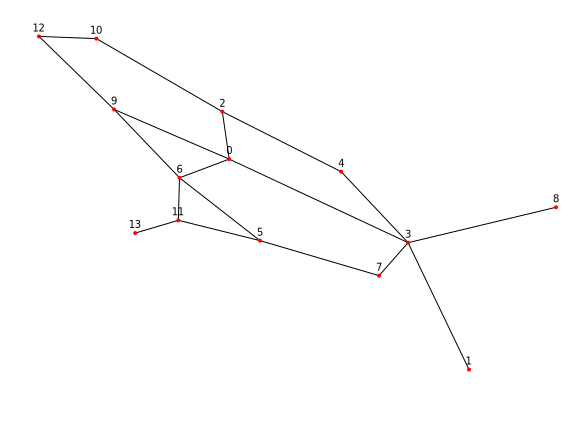

In [29]:
w = [17, 21, -4, -11, 17, 20, 34, 9, 2, -30, 33, -62, -9, 34, -23, -34, 9, -48, 2, -10, 33, -46, 24, 17, -35, -32, 28, 21, -31, -28, -19, 24, 27, 17, 20, -47, 41, 34, -18, -15, -36, -23, 40, -30, 33, -19, -2, 41, -16, 34, -23, -15, -36, -3, 40, 33]
S = subdivision_of_points(d38,-w)#compute subdivision

Tmc = S.pm_subdivision.TIGHT_SPAN
Mp = Tmc.MAXIMAL_POLYTOPES#obtain maximal polytopes
Mp = [Vector(pm.row(Mp,i)) for i in 1:nrows(Mp)]#convert maximal polytopes to usable type
Mc = maximal_cells(S)#maximal cells of S
G = S.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
G = Graph{Undirected}(G.ADJACENCY)
visualize(G)

In [30]:
common_vertex(Mc)

Int64[]

In [31]:
is_tree(G)

false

In [32]:
leaf_cvp(Mc,G)

4-element Vector{Int64}:
 37
 43
 48
 55

**$G_4$ Branch common vertex property**

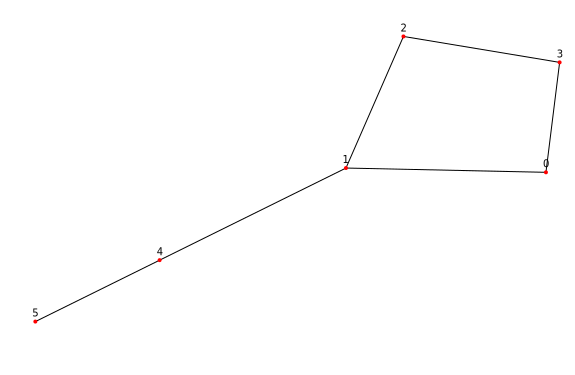

In [33]:
w = [1, 8, 1, -20, 8, 8, 8, -20, -20, 8, 8, 8, -13, 15, 15, -20, 8, 8, -13, -13, 15, 8, -20, 1, 8, 8, 8, 8, -20, -20, 1, 8, 8, 8, 8, -20, -13, 8, 15, 15, -20, -13, -13, 8, 8, 15, 8, 15, 15, 15, 15, -118, 8, 8, 15, 15]
S = subdivision_of_points(d38,-w)#compute subdivision

Tmc = S.pm_subdivision.TIGHT_SPAN
Mp = Tmc.MAXIMAL_POLYTOPES#obtain maximal polytopes
Mp = [Vector(pm.row(Mp,i)) for i in 1:nrows(Mp)]#convert maximal polytopes to usable type
Mc = maximal_cells(S)#maximal cells of S
G = S.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
G = Graph{Undirected}(G.ADJACENCY)
visualize(G)

In [34]:
common_vertex(Mc)

Int64[]

In [35]:
is_tree(G)

false

In [36]:
leaf_cvp(Mc,G)

Int64[]

In [37]:
branch_cvp(Mc,G)

16-element Vector{Int64}:
  1
  3
  7
 10
 11
 12
 17
 18
 24
 31
 38
 44
 45
 47
 53
 54

**$G_5$ Fin common vertex property**

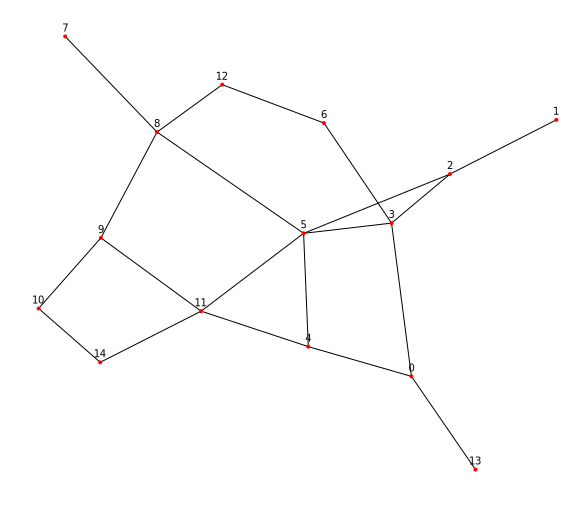

In [38]:
w = [-4, -22, 0, -36, 15, 15, -9, -32, 7, 28, 28, -5, -11, -35, -35, 11, 32, 32, 26, 26, -31, -4, -27, -3, 18, 18, 0, -21, 15, 15, 1, 22, 22, 16, 16, -56, -47, 7, 28, 28, -16, 5, 5, -1, -1, -28, 11, 32, 32, 26, 26, -31, -27, -27, -24, -30]
S = subdivision_of_points(d38,-w)#compute subdivision

Tmc = S.pm_subdivision.TIGHT_SPAN
Ts = polyhedral_complex(Tmc)
Mp = Tmc.MAXIMAL_POLYTOPES#obtain maximal polytopes
Mp = [Vector{Int64}(pm.row(Mp,i)) for i in 1:nrows(Mp)]#convert maximal polytopes to usable type
Mc = maximal_cells(S)#maximal cells of S
G = S.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
G = Graph{Undirected}(G.ADJACENCY)
visualize(G)

In [39]:
common_vertex(Mc)

Int64[]

In [40]:
is_tree(G)

false

In [41]:
leaf_cvp(Mc,G)

Int64[]

In [42]:
branch_cvp(Mc,G)

Int64[]

In [43]:
fin_1_cvp(Mc,G,Ts,Mp)

8-element Vector{Int64}:
 10
 11
 17
 18
 39
 40
 48
 49

***$G_6$ Fin tree complex***

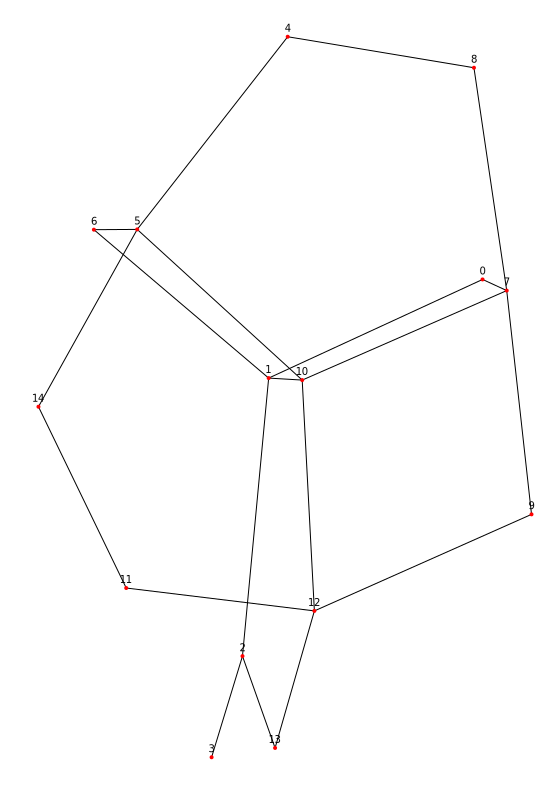

In [44]:
w = [-18, -46, 17, 17, 59, 52, -18, 24, 24, -284, -186, 17, 17, 59, 52, -67, 101, 94, 101, 94, -109, -46, 17, 17, 59, 52, -137, -137, 10, 3, -95, 73, 66, 73, 66, -102, 17, 17, 59, 52, -67, 101, 94, 101, 94, -109, -95, 73, 66, 73, 66, -102, -116, -123, -60, -60]
S = subdivision_of_points(d38,-w)#compute subdivision

Tmc = S.pm_subdivision.TIGHT_SPAN
Ts = polyhedral_complex(Tmc)
Mp = Tmc.MAXIMAL_POLYTOPES#obtain maximal polytopes
Mp = [Vector(pm.row(Mp,i)) for i in 1:nrows(Mp)]#convert maximal polytopes to usable type
Mc = maximal_cells(S)#maximal cells of S
G = S.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
G = Graph{Undirected}(G.ADJACENCY)
visualize(G)

In [45]:
common_vertex(Mc)

Int64[]

In [46]:
is_tree(G)

false

In [47]:
leaf_cvp(Mc,G)

Int64[]

In [48]:
branch_cvp(Mc,G)

Int64[]

In [50]:
fin_1_cvp(Mc,G,Ts,Mp)

Int64[]

In [51]:
fins_tree(G,Ts,Mp)

(true, Undirected graph with 5 nodes and 4 edges)

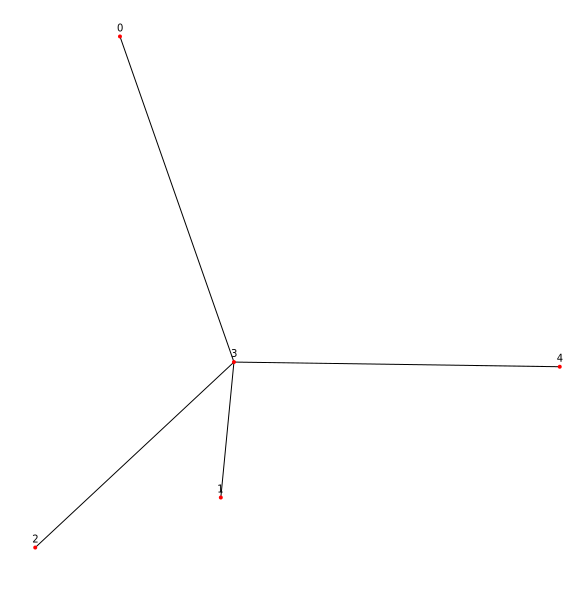

In [52]:
visualize(fins_tree(G,Ts,Mp)[2])

# Complete classification of subdivisions


The code below loops through all representative height functions for cones, checking for the correct property, and adding it to the appropriate set $G_{1},G_{2},G_{3},G_{4},G_{5},G_{6}$.

**warning :** Fully implementing this classification is time consuming.

In [54]:
codim0 = file2SetVectors("allRepsByCodim/codim_0.dat")
codim1 = file2SetVectors("allRepsByCodim/codim_1.dat")
codim2 = file2SetVectors("allRepsByCodim/codim_2.dat")
codim3 = file2SetVectors("allRepsByCodim/codim_3.dat")
codim4 = file2SetVectors("allRepsByCodim/codim_4.dat")
codim5 = file2SetVectors("allRepsByCodim/codim_5.dat")
codim6 = file2SetVectors("allRepsByCodim/codim_6.dat")
codim7 = file2SetVectors("allRepsByCodim/codim_7.dat")
all_cones = union(codim0,codim1,codim2,codim3,codim4,codim5,codim6,codim7)

57343-element Vector{Vector{Int64}}:
 [95, -164, -255, -255, 95, -164, 95, 354, 354, -332  …  -332, 354, -255, 354, -255, 95, -458, -332, 354, 354]
 [47, -79, -93, -198, 180, 173, 47, 33, 33, -359  …  -93, 180, 173, 180, 173, -254, -184, -191, -128, -128]
 [-104, -125, -251, -251, -104, -153, -104, 225, 225, -104  …  -314, 204, -230, 204, -230, -48, -258, -342, 176, 176]
 [31, -172, 31, -389, 290, 290, 24, -123, -88, -214  …  24, 248, 248, 283, 283, -354, -214, -214, -326, -291]
 [276, -354, -123, -305, 276, 115, 276, 87, 115, -354  …  -25, 346, 185, 374, 213, -256, -375, -186, 185, 213]
 [-15, -60, -65, -65, 13, 13, -39, 46, 46, 34  …  -60, 66, 66, 66, 66, -54, -37, -37, -34, -34]
 [23, -194, -89, -369, 310, 310, 16, -89, -54, -250  …  -54, 310, 310, 345, 345, -432, -320, -320, -292, -257]
 [-107, -23, 68, -86, 250, 243, -107, -247, -191, -240  …  -37, 89, 82, 145, 138, -86, -135, -142, -226, -170]
 [174, -190, -281, -379, 174, -22, 111, 230, 237, -281  …  -183, 265, 69, 272, 76, -106

In [55]:
for i in 1:length(all_cones)
 
    w = all_cones[i]
 
    S = subdivision_of_points(d38,-w)#compute subdivision
    
    Tmc = S.pm_subdivision.TIGHT_SPAN
    Ts = polyhedral_complex(Tmc)
    
    Mp = Tmc.MAXIMAL_POLYTOPES#obtain maximal polytopes
    Mp = [Vector{Int64}(pm.row(Mp,i)) for i in 1:nrows(Mp)]#convert maximal polytopes to usable type
    
    Mc = maximal_cells(S)#maximal cells of S
    
    G = S.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
    G = Graph{Undirected}(G.ADJACENCY)
    
    if length(common_vertex(Mc))>0
       # println(i," cvp!")
        
        txtcvp = vec2String(w)
        open("notebooks/new_save_grand_scheme/cvp2.dat", "a")do file
        write(file, txtcvp,"\n")
        end
        continue
        
    elseif is_tree(G) #F = E -V + 1
        # println(i," tree!")
        
        txttree = vec2String(w)
        open("notebooks/new_save_grand_scheme/tree2.dat", "a")do file
        write(file, txttree,"\n")
        end
        continue

    elseif length(leaf_cvp(Mc,G))>0
        #println(i," leaf!")
        
        txtleaf = vec2String(w)
        open("notebooks/new_save_grand_scheme/leaf_cvp2.dat", "a")do file
        write(file, txtleaf,"\n")
        end
        continue
    
    elseif length(branch_cvp(Mc,G))>0
        #println(i," branch!")
     
        txtbranch = vec2String(w)
        open("notebooks/new_save_grand_scheme/branch_cvp2.dat", "a")do file
        write(file, txtbranch,"\n")
        end
        continue
    
    elseif length(fin_1_cvp(Mc,G,Ts,Mp))>0
        #println(i," fin1!")
     
        txtfin = vec2String(w)
        open("notebooks/new_save_grand_scheme/fin_cvp2.dat", "a")do file
        write(file, txtfin,"\n")
            end
        continue
    elseif fins_tree(G,Ts,Mp)[1]
        #println(i," fin2!")
      
        txtfintree = vec2String(w)
        open("notebooks/new_save_grand_scheme/fin_tree2.dat", "a")do file
        write(file, txtfintree,"\n")
        end
        continue
        
    else
        #println(i," uh oh")
        
        txtcatch = vec2String(w)
        open("notebooks/new_save_grand_scheme/catch2.dat", "a")do file
        write(file, txtcatch,"\n")
            end
        continue
        
        
    end

end

print("DONE :)")

DONE :)

In [58]:
a1 = vec(readlines("notebooks/new_save_grand_scheme/cvp2.dat"))
a2 = vec(readlines("notebooks/new_save_grand_scheme/tree2.dat"))
a3 = vec(readlines("notebooks/new_save_grand_scheme/leaf_cvp2.dat"))
a4 = vec(readlines("notebooks/new_save_grand_scheme/branch_cvp2.dat"))
a5 = vec(readlines("notebooks/new_save_grand_scheme/fin_cvp2.dat"))
a6 = vec(readlines("notebooks/new_save_grand_scheme/fin_tree2.dat"))

389-element Vector{String}:
 "-48 -55 155 155 15 15 -48 -209 " ⋯ 152 bytes ⋯ " 92 92 92 -174 -160 -160 15 15"
 "-19 -19 23 23 23 23 -19 -54 -54" ⋯ 130 bytes ⋯ "3 23 23 23 -19 -19 -19 -19 -19"
 "-68 -187 135 135 16 16 -68 -187" ⋯ 158 bytes ⋯ " 93 93 -47 -152 -152 -166 -166"
 "-73 -122 -206 -206 -73 -122 -52" ⋯ 182 bytes ⋯ "214 -206 -73 -346 -255 214 214"
 "-80 -143 32 32 81 74 -80 -31 -3" ⋯ 149 bytes ⋯ "67 60 -101 -150 -157 -192 -192"
 "179 -157 39 39 179 18 179 39 39" ⋯ 162 bytes ⋯ "79 39 179 39 179 18 -122 39 39"
 "22 -22 8 8 21 6 22 4 4 -13 -43 " ⋯ 107 bytes ⋯ "13 -26 20 8 20 8 21 -1 -13 3 3"
 "-100 -268 19 19 96 96 -170 12 1" ⋯ 160 bytes ⋯ "3 103 -156 -212 -212 -240 -240"
 "-18 -46 17 17 59 52 -18 24 24 -" ⋯ 139 bytes ⋯ "6 73 66 -102 -116 -123 -60 -60"
 "-109 -60 31 31 52 66 -109 -39 -" ⋯ 131 bytes ⋯ " 80 66 80 -4 -130 -221 -74 -74"
 "-166 -75 30 30 107 100 -166 -82" ⋯ 143 bytes ⋯ "79 86 79 -54 -271 -173 -75 -75"
 "-72 -30 33 33 82 75 -72 -30 -30" ⋯ 150 bytes ⋯ "4 61 54 -107 -23 -30

In [59]:
length(a1)#13641 in paper

13640

In [60]:
length(a2)#on point 

215

In [61]:
length(a3)#on point 

28227

In [62]:
length(a4)#on point 

483

In [63]:
length(a5)#on point

14389

In [64]:
length(a6)#on point

389

In [66]:
length(a1) + length(a2) + length(a3) + length(a4) + length(a5) + length(a6)  == length(all_cones)

true

In [72]:
A = subsets([a1,a2,a3,a4,a5,a6],2)#check for disjoint

15-element Vector{Vector{Vector{String}}}:
 [["-15 -60 -65 -65 13 13 -39 46 46 34 34 1 1 -71 -71 -52 74 74 74 74 -46 -23 32 32 20 20 -13 -13 5 5 -66 60 60 60 60 -60 38 38 26 26 -65 -44 -44 -44 -44 -74 -60 66 66 66 66 -54 -37 -37 -34 -34", "174 -190 -281 -379 174 -22 111 230 237 -281 69 -134 -127 111 -85 -218 230 34 237 41 69 -1 328 335 -183 -253 -36 -29 -1 -197 -120 328 132 335 139 -253 265 272 -246 -106 -379 -372 223 -365 230 -288 -183 265 69 272 76 -106 -379 -225 223 230", "68 -93 -261 -184 68 33 -44 138 110 -44 47 -23 -51 -44 -79 -114 138 103 110 75 47 40 117 89 -65 26 -44 -72 40 5 -135 117 82 89 54 26 110 82 -72 19 54 -135 -149 -128 -37 -226 -107 110 75 82 47 19 54 19 -149 -37", "458 -74 178 -354 458 220 -529 563 31 -438 605 31 -501 -529 73 -564 563 -305 31 -522 605 353 -270 388 -536 -543 73 -144 353 115 108 -270 -508 388 150 -543 458 -74 -543 500 493 -431 -123 -508 535 -389 -39 458 -410 -74 3 500 493 -375 -123 535", "-54 -110 -19 -19 30 23 -19 72 72 -124 -131 -124 -124 65 58 -54 1

In [70]:
[intersect(b[1],b[2]) for b in A]

15-element Vector{Vector{String}}:
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []
 []